<h1 style="text-align:center; font-family:courier; font-size:300%">News Classification (ML Algorithms)</h1>

## Importing the necessary Libraries

In [4]:
import pandas as pd
import numpy as np

import plotly.express as px  ## plotly -> interactive plots

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from wordcloud import WordCloud  ## To visualize the most frequent words
import nltk
import string

from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer  ## Text to Numbers
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score

In [8]:
import pickle

## Dataset Import

In [9]:
## category is present
df_train = pd.read_csv('data-sets/BBC News Train.csv')
df_train.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

In [10]:
df_train.shape

(1490, 3)

In [11]:
## category is not present -> We need to find
df_test  = pd.read_csv('data-sets/BBC News Test.csv')
df_test.head()

ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...

## Data Preprocessing
### i) Category Feature

In [12]:
df_train.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [13]:
## Counts in each category
df_train.Category.value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [14]:
## Assigning numbers to each and every category
df_train['CategoryId'] = df_train['Category'].factorize()[0]
df_train.head()

ArticleId                                               Text  Category  \
0       1833  worldcom ex-boss launches defence lawyers defe...  business   
1        154  german business confidence slides german busin...  business   
2       1101  bbc poll indicates economic gloom citizens in ...  business   
3       1976  lifestyle  governs mobile choice  faster  bett...      tech   
4        917  enron bosses in $168m payout eighteen former e...  business   

   CategoryId  
0           0  
1           0  
2           0  
3           1  
4           0

In [15]:
## category name with respect to category-id (ascending order based on CategoryID)
category = df_train[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
category

Category  CategoryId
0       business           0
3           tech           1
5       politics           2
6          sport           3
7  entertainment           4

In [16]:
## Bar chart
fig = px.bar(df_train['Category'], orientation='h', title='Category Distribution')
fig.show()

In [14]:
## Pie-chart
fig = px.pie(df_train, names = df_train['Category'], title='Category Distribution')
fig.show()

### ii) World Cloud Vector

In [17]:
def wordcloud_draw(dataset, color = 'white'):
    stop     = set(stopwords.words('english'))
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop, background_color = color, width = 2500, height = 2500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

Business related words:


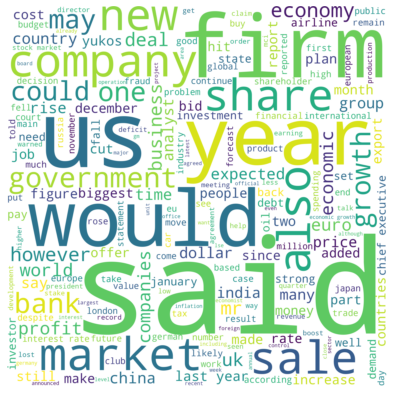

In [18]:
business = df_train[df_train['CategoryId'] == 0]
business = business['Text']

print("Business related words:")
wordcloud_draw(business, 'white')

tech related words:


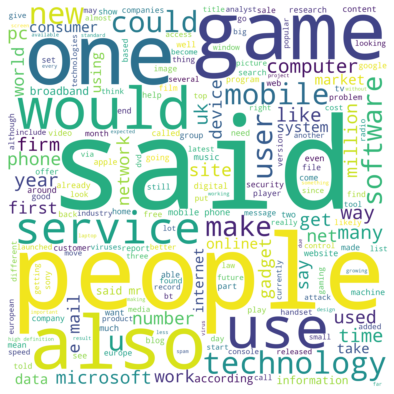

In [22]:
tech = df_train[df_train['CategoryId'] == 1]
tech = tech['Text']

print("tech related words:")
wordcloud_draw(tech, 'white')

politics related words:


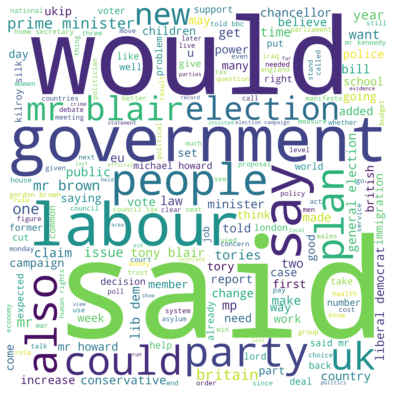

In [20]:
politics = df_train[df_train['CategoryId'] == 2]
politics = politics['Text']

print("politics related words:")
wordcloud_draw(politics, 'white')

sport related words:


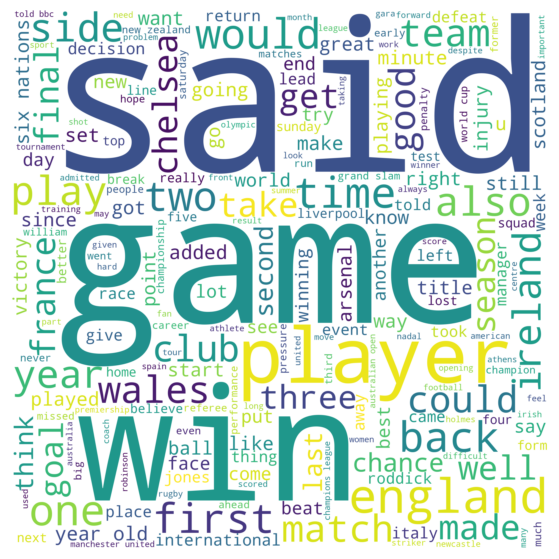

In [19]:
sport = df_train[df_train['CategoryId'] == 3]
sport = sport['Text']

print("sport related words:")
wordcloud_draw(sport, 'white')

entertainment related words:


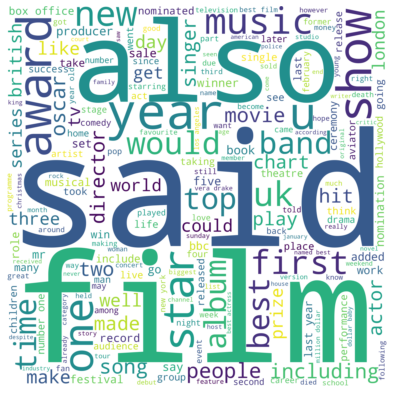

In [23]:
entertainment = df_train[df_train['CategoryId'] == 4]
entertainment = entertainment['Text']

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

### iii) Tokenisation of Data

In [24]:
def tokenization(text):
    lst=text.split()
    return lst

In [25]:
df_train.iloc[:, 1].head()

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [26]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(tokenization)
df_train.iloc[:, 1].head()

0    [worldcom, ex-boss, launches, defence, lawyers...
1    [german, business, confidence, slides, german,...
2    [bbc, poll, indicates, economic, gloom, citize...
3    [lifestyle, governs, mobile, choice, faster, b...
4    [enron, bosses, in, $168m, payout, eighteen, f...
Name: Text, dtype: object

### iv) Remove Punctuations from the Data

In [26]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in string.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst

In [27]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(remove_punctuations) 
df_train.iloc[:, 1].head()

0    [worldcom, exboss, launches, defence, lawyers,...
1    [german, business, confidence, slides, german,...
2    [bbc, poll, indicates, economic, gloom, citize...
3    [lifestyle, governs, mobile, choice, faster, b...
4    [enron, bosses, in, 168m, payout, eighteen, fo...
Name: Text, dtype: object

### v) Removal of Numbers (digits)

In [27]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in lst:                 ## going sentence by sentence
        for j in  string.digits:  ## operations within a sentence
            i = i.replace(j,'')   ## numbers -> empty
        nodig_lst.append(i)
        
    for i in nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst

In [29]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(remove_numbers) 
df_train.iloc[:, 1].head()

0    [worldcom, exboss, launches, defence, lawyers,...
1    [german, business, confidence, slides, german,...
2    [bbc, poll, indicates, economic, gloom, citize...
3    [lifestyle, governs, mobile, choice, faster, b...
4    [enron, bosses, in, m, payout, eighteen, forme...
Name: Text, dtype: object

### vi) Removal of StopWords

In [28]:
def remove_stopwords(lst):
    stop=stopwords.words('english')
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

In [29]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(remove_stopwords) 
print(len(df_train.iloc[:, 1]))

1490


### vii) Lemmatization of Data

In [30]:
def lemmatzation(lst):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    new_lst = []
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst

In [33]:
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(lemmatzation) 
df_train.iloc[:, 1].head()

0    [worldcom, ex-boss, launch, defence, lawyer, d...
1    [german, business, confidence, slide, german, ...
2    [bbc, poll, indicates, economic, gloom, citize...
3    [lifestyle, governs, mobile, choice, faster, b...
4    [enron, boss, $168m, payout, eighteen, former,...
Name: Text, dtype: object

In [34]:
## After lemmatization joining back into sentences
df_train.iloc[:, 1] = df_train.iloc[:, 1].apply(lambda x: ''.join(i+' ' for i in x))
df_train.iloc[:, 1].head()

0    worldcom ex-boss launch defence lawyer defendi...
1    german business confidence slide german busine...
2    bbc poll indicates economic gloom citizen majo...
3    lifestyle governs mobile choice faster better ...
4    enron boss $168m payout eighteen former enron ...
Name: Text, dtype: object

# Model Building

## i) Split into Dependent and Independent Features

In [35]:
x = df_train['Text']
y = df_train['CategoryId']

In [36]:
x

0       worldcom ex-boss launch defence lawyer defendi...
1       german business confidence slide german busine...
2       bbc poll indicates economic gloom citizen majo...
3       lifestyle governs mobile choice faster better ...
4       enron boss $168m payout eighteen former enron ...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hit reuters revenue medium group r...
1488    apple ipod family expands market apple expande...
1489    santy worm make unwelcome visit thousand websi...
Name: Text, Length: 1490, dtype: object

In [37]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1485    4
1486    4
1487    0
1488    1
1489    1
Name: CategoryId, Length: 1490, dtype: int64

In [38]:
df_train.Text

0       worldcom ex-boss launch defence lawyer defendi...
1       german business confidence slide german busine...
2       bbc poll indicates economic gloom citizen majo...
3       lifestyle governs mobile choice faster better ...
4       enron boss $168m payout eighteen former enron ...
                              ...                        
1485    double eviction big brother model caprice holb...
1486    dj double act revamp chart show dj duo jk joel...
1487    weak dollar hit reuters revenue medium group r...
1488    apple ipod family expands market apple expande...
1489    santy worm make unwelcome visit thousand websi...
Name: Text, Length: 1490, dtype: object

## ii) Vectorizing the x-data

In [39]:
x = np.array(x.values)
y = np.array(y.values)

cv = CountVectorizer(max_features = 5000)
x  = cv.fit_transform(df_train.Text).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1490, 5000)
y.shape =  (1490,)


## iii) Split into train and test data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1043
447


## iv) Fitting the data into model

In [41]:
def model_run(model_name, est_c, est_pnlty):

    mdl=''

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)

    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)

    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    # Add performance parameters to list
    perform_list = []
    perform_list.append(dict([

    ('Model', model_name),('Test Accuracy', round(accuracy, 2)), 
    ('Precision', round(precision, 2)), 
    ('Recall', round(recall, 2)), ('F1', round(f1score, 2))

    ]))
    
    return perform_list

In [42]:
final_results = []  ## to store the entire analysis of the model

In [43]:
result1 = model_run('Logistic Regression', est_c=None, est_pnlty=None)
final_results.append(result1)

In [44]:
result2 = model_run('Random Forest', est_c=None, est_pnlty=None)
final_results.append(result2)

In [45]:
result3 = model_run('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
final_results.append(result3)

In [46]:
result4 = model_run('Support Vector Classifer', est_c=None, est_pnlty=None)
final_results.append(result4)

In [47]:
result5 = model_run('Decision Tree Classifier', est_c=None, est_pnlty=None)
final_results.append(result5)

In [50]:
result6 = model_run('K Nearest Neighbour', est_c=None, est_pnlty=None)
final_results.append(result6)

In [51]:
result7 = model_run('Gaussian Naive Bayes', est_c=None, est_pnlty=None)
final_results.append(result7)

## Summary of All the Models

In [52]:
for i in final_results:
    print(i)

[{'Model': 'Logistic Regression', 'Test Accuracy': 97.32, 'Precision': 0.97, 'Recall': 0.97, 'F1': 0.97}]
[{'Model': 'Random Forest', 'Test Accuracy': 96.64, 'Precision': 0.97, 'Recall': 0.97, 'F1': 0.97}]
[{'Model': 'Multinomial Naive Bayes', 'Test Accuracy': 96.87, 'Precision': 0.97, 'Recall': 0.97, 'F1': 0.97}]
[{'Model': 'Support Vector Classifer', 'Test Accuracy': 96.64, 'Precision': 0.97, 'Recall': 0.97, 'F1': 0.97}]
[{'Model': 'Decision Tree Classifier', 'Test Accuracy': 80.09, 'Precision': 0.8, 'Recall': 0.8, 'F1': 0.8}]
[{'Model': 'K Nearest Neighbour', 'Test Accuracy': 72.93, 'Precision': 0.73, 'Recall': 0.73, 'F1': 0.73}]
[{'Model': 'Gaussian Naive Bayes', 'Test Accuracy': 77.85, 'Precision': 0.78, 'Recall': 0.78, 'F1': 0.78}]
[{'Model': 'K Nearest Neighbour', 'Test Accuracy': 72.93, 'Precision': 0.73, 'Recall': 0.73, 'F1': 0.73}]
[{'Model': 'Gaussian Naive Bayes', 'Test Accuracy': 77.85, 'Precision': 0.78, 'Recall': 0.78, 'F1': 0.78}]


In [49]:
## Here Logistic Regression Classifier has the highest accuracy on the test data with 97.54

## Saving the Model as pickel

In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [54]:
pickle.dump(model, open('lr.pkl', 'wb'))

In [55]:
pickled_model = pickle.load(open('lr.pkl', 'rb'))
pickled_model

LogisticRegression()

## Predicting with Test Data

In [56]:
test_data = '''
Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. 
I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, 
and I am not feeling backed, said Ashwin
'''

In [57]:
y_pred1 = cv.transform([test_data])
yy      = pickled_model.predict(y_pred1)

result = ""

if yy == [0]:   result = "Business News"
elif yy == [1]: result = "Tech News"
elif yy == [2]: result = "Politics News"
elif yy == [3]: result = "Sports News"
elif yy == [1]: result = "Entertainment News"
        
print(result)

Sports News
